In [2]:
import numpy as np
import sympy as smp

In [3]:
smp.init_printing(use_unicode=True)

### Two cars are travelling towards each other, each at a speed of 20 m/s. When the cars are 300 m apart, both drivers apply brakes and the cars decelerate (or retard) at a rate of 2 m/s^2. What is the distance between them when they come to rest?


In [4]:
v , u , a , s =smp.symbols('v u a s')

In [ ]:
formula= smp.Eq(v**2 - u**2 , 2*a*s)
eq=smp.solve(formula,s)[0]
eq.subs({v:0,a:-2,u:20})


AttributeError: 'list' object has no attribute 'subs'

### yt first problem


A falling object encounters a moving platform accelerating upwards:
1. Object: $h_o(t) = h_0 - v_0 t - \frac{1}{2} g t^2$
2. Platform: $h_p(t) = v_p t + \frac{1}{2} q t^2$

Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.

We need to solve for $v_0$ and $t$ in the two equations:
1. $h_o(t) = h_p(t)$
2. $\frac{dh_o}{dt}(t) = - \frac{dh_p}{dt}(t)$

In sympy, need to construct our system of equations as $EQ_1 = 0, EQ_2 = 0, ...$ In our case, we rewrite them as:
1. $h_o(t) - h_p(t) = 0$
2. $\frac{dh_o}{dt} + \frac{dh_p}{dt} = 0$

In [6]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

In [7]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

In [8]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

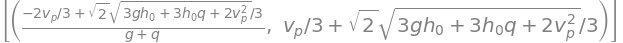

In [9]:
smp.solve([eq1, eq2], [t, v0])

In [10]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

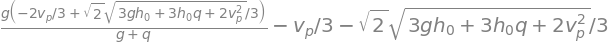

In [11]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)])

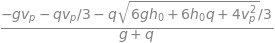

In [12]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()


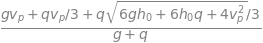

In [13]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

### hydrogen wave function


**Examples**

The hydrogen wave function is given by
$\psi_{nlm}(r, \theta, \phi) = R_{nl}(r) Y_l^m(\theta, \phi)$

where
$R_{nl}(r) = \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l L_{n-l-1}^{2l+1}(2r/na)$

The mean distance from the nucleus of the electron:
$\langle r \rangle = \int_0^\infty R_{nl}^2 r^3 dr$

The standard deviation in the distance from the nucleus of the electron:
$\sigma = \sqrt{\langle r^2 \rangle - \langle r \rangle^2} = \sqrt{\left(\int_0^\infty R_{nl}^2 r^4 dr\right) - \left(\int_0^\infty R_{nl}^2 r^3 dr\right)^2}$

In [14]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

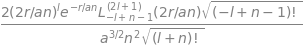

In [15]:
R = smp.sqrt(((2/(n*a))**3)*smp.factorial(n-l-1)/(2*n*smp.factorial(n+l))) * smp.exp(-r/(n*a)) * ((2*r)/(n*a))**l * smp.assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

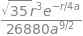

In [16]:
R_10 = R.subs([(n,4),(l,3)])
R_10

In [17]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))
compute_int(3,1,3)

In [18]:

def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)
ns = np.arange(1,10)
ds =[compute_mean_distance(ni) for ni in ns]
print(ds)

[1.5, 6, 13.5, 24, 37.5, 54, 73.5, 96, 121.5]
